<a href="https://colab.research.google.com/github/seher13/Nba/blob/main/NBA_stats_2021_22_Web_scrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import re
from bs4 import BeautifulSoup

In [2]:
url = 'https://www.basketball-reference.com/leagues/NBA_2022_per_game.html'
data = requests.get(url).text

In [3]:
soup = BeautifulSoup(data, 'html5lib')

In [4]:
tables = soup.find_all('table')

In [5]:
len(tables)

1

In [6]:
df = pd.read_html(str(tables))[0]

In [7]:
df.iloc[:30,:]

Rk                    Player  Pos  Age   Tm  ...  STL  BLK  TOV   PF   PTS
0    1          Precious Achiuwa    C   22  TOR  ...  0.5  0.6  1.0  2.0   7.7
1    2              Steven Adams    C   28  MEM  ...  0.9  0.6  1.6  1.8   6.6
2    3               Bam Adebayo    C   24  MIA  ...  1.6  0.6  3.0  3.2  18.3
3    4              Santi Aldama   PF   21  MEM  ...  0.1  0.3  0.3  1.0   3.3
4    5         LaMarcus Aldridge    C   36  BRK  ...  0.4  1.1  0.9  1.8  13.4
5    6  Nickeil Alexander-Walker   SG   23  NOP  ...  0.8  0.4  1.7  1.8  12.8
6    7             Grayson Allen   SG   26  MIL  ...  0.8  0.3  0.6  1.4  11.7
7    8             Jarrett Allen    C   23  CLE  ...  0.8  1.4  1.8  1.8  16.2
8    9             Jose Alvarado   PG   23  NOP  ...  1.1  0.1  0.3  1.3   4.5
9   10           Justin Anderson   SF   28  TOT  ...  0.3  0.2  0.5  1.5   3.5
10  10           Justin Anderson   SF   28  CLE  ...  0.3  0.0  0.7  1.3   4.3
11  10           Justin Anderson   SF   28  IND  ...  0.3  0.3  0.3  1.7   2.7
12  11             Kyle Anderson   PF   28  MEM  ...  1.1  0.6  1.0  1.5   7.8
13  12     Giannis Antetokounmpo   PF   27  MIL  ...  1.0  1.4  3.4  3.2  28.9
14  13    Thanasis Antetokounmpo   SF   29  MIL  ...  0.4  0.3  0.6  1.8   2.9
15  14           Carmelo Anthony   PF   37  LAL  ...  0.7  0.8  0.9  2.2  13.4
16  15              Cole Anthony   PG   21  ORL  ...  0.9  0.3  2.8  2.6  17.7
17  16                OG Anunoby   SF   24  TOR  ...  1.7  0.6  1.8  3.0  18.5
18  17              Trevor Ariza   SF   36  LAL  ...  0.4  0.3  0.5  0.8   3.9
19  18             D.J. Augustin   PG   34  HOU  ...  0.3  0.0  1.3  0.5   5.4
20  19               Deni Avdija   SF   21  WAS  ...  0.8  0.6  0.9  2.3   7.3
21  20                Joel Ayayi   SG   21  WAS  ...  0.0  0.0  0.0  0.0   0.3
22  Rk                    Player  Pos  Age   Tm  ...  STL  BLK  TOV   PF   PTS
23  21             Deandre Ayton    C   23  PHO  ...  0.8  0.8  1.7  2.3  16.3
24  22            Udoka Azubuike    C   22  UTA  ...  0.1  0.8  0.7  1.2   3.3
25  23         Marvin Bagley III   PF   22  SAC  ...  0.3  0.4  0.7  1.7   9.3
26  24               LaMelo Ball   PG   20  CHO  ...  1.5  0.4  3.1  3.1  19.5
27  25                Lonzo Ball   PG   24  CHI  ...  1.8  0.9  2.3  2.4  13.0
28  26                  Mo Bamba    C   23  ORL  ...  0.6  2.0  1.3  2.5  10.0
29  27              Desmond Bane   SF   23  MEM  ...  1.1  0.5  1.5  2.4  17.8

[30 rows x 30 columns]

In [8]:
df2 = df[~df.Pos.str.contains('Pos')]

In [9]:
df2.head(30)

Rk                    Player Pos Age   Tm  ...  STL  BLK  TOV   PF   PTS
0    1          Precious Achiuwa   C  22  TOR  ...  0.5  0.6  1.0  2.0   7.7
1    2              Steven Adams   C  28  MEM  ...  0.9  0.6  1.6  1.8   6.6
2    3               Bam Adebayo   C  24  MIA  ...  1.6  0.6  3.0  3.2  18.3
3    4              Santi Aldama  PF  21  MEM  ...  0.1  0.3  0.3  1.0   3.3
4    5         LaMarcus Aldridge   C  36  BRK  ...  0.4  1.1  0.9  1.8  13.4
5    6  Nickeil Alexander-Walker  SG  23  NOP  ...  0.8  0.4  1.7  1.8  12.8
6    7             Grayson Allen  SG  26  MIL  ...  0.8  0.3  0.6  1.4  11.7
7    8             Jarrett Allen   C  23  CLE  ...  0.8  1.4  1.8  1.8  16.2
8    9             Jose Alvarado  PG  23  NOP  ...  1.1  0.1  0.3  1.3   4.5
9   10           Justin Anderson  SF  28  TOT  ...  0.3  0.2  0.5  1.5   3.5
10  10           Justin Anderson  SF  28  CLE  ...  0.3  0.0  0.7  1.3   4.3
11  10           Justin Anderson  SF  28  IND  ...  0.3  0.3  0.3  1.7   2.7
12  11             Kyle Anderson  PF  28  MEM  ...  1.1  0.6  1.0  1.5   7.8
13  12     Giannis Antetokounmpo  PF  27  MIL  ...  1.0  1.4  3.4  3.2  28.9
14  13    Thanasis Antetokounmpo  SF  29  MIL  ...  0.4  0.3  0.6  1.8   2.9
15  14           Carmelo Anthony  PF  37  LAL  ...  0.7  0.8  0.9  2.2  13.4
16  15              Cole Anthony  PG  21  ORL  ...  0.9  0.3  2.8  2.6  17.7
17  16                OG Anunoby  SF  24  TOR  ...  1.7  0.6  1.8  3.0  18.5
18  17              Trevor Ariza  SF  36  LAL  ...  0.4  0.3  0.5  0.8   3.9
19  18             D.J. Augustin  PG  34  HOU  ...  0.3  0.0  1.3  0.5   5.4
20  19               Deni Avdija  SF  21  WAS  ...  0.8  0.6  0.9  2.3   7.3
21  20                Joel Ayayi  SG  21  WAS  ...  0.0  0.0  0.0  0.0   0.3
23  21             Deandre Ayton   C  23  PHO  ...  0.8  0.8  1.7  2.3  16.3
24  22            Udoka Azubuike   C  22  UTA  ...  0.1  0.8  0.7  1.2   3.3
25  23         Marvin Bagley III  PF  22  SAC  ...  0.3  0.4  0.7  1.7   9.3
26  24               LaMelo Ball  PG  20  CHO  ...  1.5  0.4  3.1  3.1  19.5
27  25                Lonzo Ball  PG  24  CHI  ...  1.8  0.9  2.3  2.4  13.0
28  26                  Mo Bamba   C  23  ORL  ...  0.6  2.0  1.3  2.5  10.0
29  27              Desmond Bane  SF  23  MEM  ...  1.1  0.5  1.5  2.4  17.8
30  28             Dalano Banton  SF  22  TOR  ...  0.5  0.2  1.0  1.2   3.5

[30 rows x 30 columns]

In [10]:
df3 = df2.set_index('Rk')

In [11]:
df3.head()

Player Pos Age   Tm   G  GS  ...  AST  STL  BLK  TOV   PF   PTS
Rk                                          ...                               
1    Precious Achiuwa   C  22  TOR  43  22  ...  1.2  0.5  0.6  1.0  2.0   7.7
2        Steven Adams   C  28  MEM  51  50  ...  3.1  0.9  0.6  1.6  1.8   6.6
3         Bam Adebayo   C  24  MIA  30  30  ...  3.5  1.6  0.6  3.0  3.2  18.3
4        Santi Aldama  PF  21  MEM  27   0  ...  0.5  0.1  0.3  0.3  1.0   3.3
5   LaMarcus Aldridge   C  36  BRK  36  11  ...  0.9  0.4  1.1  0.9  1.8  13.4

[5 rows x 29 columns]

In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 659 entries, 1 to 591
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Player  659 non-null    object
 1   Pos     659 non-null    object
 2   Age     659 non-null    object
 3   Tm      659 non-null    object
 4   G       659 non-null    object
 5   GS      659 non-null    object
 6   MP      659 non-null    object
 7   FG      659 non-null    object
 8   FGA     659 non-null    object
 9   FG%     646 non-null    object
 10  3P      659 non-null    object
 11  3PA     659 non-null    object
 12  3P%     596 non-null    object
 13  2P      659 non-null    object
 14  2PA     659 non-null    object
 15  2P%     632 non-null    object
 16  eFG%    646 non-null    object
 17  FT      659 non-null    object
 18  FTA     659 non-null    object
 19  FT%     566 non-null    object
 20  ORB     659 non-null    object
 21  DRB     659 non-null    object
 22  TRB     659 non-null    object


In [13]:
seznam = np.arange(df3.shape[1])

In [14]:
seznam2 = np.delete(seznam, [0,1,3])

In [15]:
seznam2

array([ 2,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28])

In [16]:
seznam3 = df3.columns[seznam2]

In [17]:
for heading in seznam3:
  df3[heading] = pd.to_numeric(df3[heading], errors='coerce')
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 659 entries, 1 to 591
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  659 non-null    object 
 1   Pos     659 non-null    object 
 2   Age     659 non-null    int64  
 3   Tm      659 non-null    object 
 4   G       659 non-null    int64  
 5   GS      659 non-null    int64  
 6   MP      659 non-null    float64
 7   FG      659 non-null    float64
 8   FGA     659 non-null    float64
 9   FG%     646 non-null    float64
 10  3P      659 non-null    float64
 11  3PA     659 non-null    float64
 12  3P%     596 non-null    float64
 13  2P      659 non-null    float64
 14  2PA     659 non-null    float64
 15  2P%     632 non-null    float64
 16  eFG%    646 non-null    float64
 17  FT      659 non-null    float64
 18  FTA     659 non-null    float64
 19  FT%     566 non-null    float64
 20  ORB     659 non-null    float64
 21  DRB     659 non-null    float64
 22  TRB    

In [18]:
df3.head()

Player Pos  Age   Tm   G  GS  ...  AST  STL  BLK  TOV   PF   PTS
Rk                                           ...                               
1    Precious Achiuwa   C   22  TOR  43  22  ...  1.2  0.5  0.6  1.0  2.0   7.7
2        Steven Adams   C   28  MEM  51  50  ...  3.1  0.9  0.6  1.6  1.8   6.6
3         Bam Adebayo   C   24  MIA  30  30  ...  3.5  1.6  0.6  3.0  3.2  18.3
4        Santi Aldama  PF   21  MEM  27   0  ...  0.5  0.1  0.3  0.3  1.0   3.3
5   LaMarcus Aldridge   C   36  BRK  36  11  ...  0.9  0.4  1.1  0.9  1.8  13.4

[5 rows x 29 columns]

In [19]:
df3.sort_values('PTS', ascending=False).head(20)

Player Pos  Age   Tm   G  GS  ...  AST  STL  BLK  TOV   PF   PTS
Rk                                                ...                               
151           Kevin Durant  PF   33  BRK  36  36  ...  5.8  0.8  0.9  3.0  1.9  29.3
158            Joel Embiid   C   27  PHI  41  41  ...  4.4  1.0  1.5  2.9  2.6  29.3
267           LeBron James  SF   37  LAL  37  37  ...  6.4  1.6  1.1  3.1  2.2  29.1
12   Giannis Antetokounmpo  PF   27  MIL  45  45  ...  5.9  1.0  1.4  3.4  3.2  28.9
450          Norman Powell  SG   28  LAC   1   0  ...  4.0  0.0  0.0  1.0  4.0  28.0
588             Trae Young  PG   23  ATL  48  48  ...  9.3  1.0  0.1  4.1  1.6  27.7
132          DeMar DeRozan  PF   32  CHI  50  50  ...  5.1  0.9  0.3  2.3  2.2  27.2
382              Ja Morant  PG   22  MEM  42  42  ...  6.9  1.3  0.4  3.5  1.4  26.4
139            Luka Dončić  PG   22  DAL  39  39  ...  9.1  1.2  0.4  4.3  2.3  26.0
283           Nikola Jokić   C   26  DEN  47  47  ...  7.9  1.4  0.7  3.6  2.6  25.9
375       Donovan Mitchell  SG   25  UTA  42  42  ...  5.2  1.6  0.3  3.0  2.5  25.7
124          Stephen Curry  PG   33  GSW  49  49  ...  6.4  1.5  0.4  3.3  2.0  25.7
515           Jayson Tatum  SF   23  BOS  51  51  ...  4.1  1.0  0.7  3.0  2.4  25.6
58            Devin Booker  SG   25  PHO  46  46  ...  4.3  1.0  0.3  2.4  2.5  25.5
317            Zach LaVine  SF   26  CHI  45  45  ...  4.4  0.6  0.4  2.7  1.7  24.8
183            Paul George  SF   31  LAC  26  26  ...  5.5  2.0  0.4  4.2  2.5  24.7
535     Karl-Anthony Towns   C   26  MIN  46  46  ...  3.9  1.0  1.2  3.3  3.6  24.3
325         Damian Lillard  PG   31  POR  29  29  ...  7.3  0.6  0.4  2.9  1.3  24.0
75            Jaylen Brown  SF   25  BOS  41  41  ...  3.0  1.1  0.4  2.9  2.7  23.9
125          Anthony Davis   C   28  LAL  33  33  ...  2.8  1.3  2.2  2.2  2.6  23.7

[20 rows x 29 columns]

In [20]:
df3['EFF'] = df3['PTS'] +  df3['TRB'] + df3['AST'] + df3['STL'] + df3['BLK'] - df3['TOV']

In [21]:
df3.head()

Player Pos  Age   Tm   G  GS  ...  STL  BLK  TOV   PF   PTS   EFF
Rk                                           ...                                
1    Precious Achiuwa   C   22  TOR  43  22  ...  0.5  0.6  1.0  2.0   7.7  16.2
2        Steven Adams   C   28  MEM  51  50  ...  0.9  0.6  1.6  1.8   6.6  19.1
3         Bam Adebayo   C   24  MIA  30  30  ...  1.6  0.6  3.0  3.2  18.3  31.0
4        Santi Aldama  PF   21  MEM  27   0  ...  0.1  0.3  0.3  1.0   3.3   6.3
5   LaMarcus Aldridge   C   36  BRK  36  11  ...  0.4  1.1  0.9  1.8  13.4  20.5

[5 rows x 30 columns]

# Top 10 NBA players analysis

In [22]:
top10 = df3.sort_values('EFF', ascending=False).head(10)

In [23]:
top10 = top10.reset_index().iloc[:,1:]
top10

Player Pos  Age   Tm   G  GS  ...  STL  BLK  TOV   PF   PTS   EFF
0           Nikola Jokić   C   26  DEN  47  47  ...  1.4  0.7  3.6  2.6  25.9  46.0
1  Giannis Antetokounmpo  PF   27  MIL  45  45  ...  1.0  1.4  3.4  3.2  28.9  45.0
2            Joel Embiid   C   27  PHI  41  41  ...  1.0  1.5  2.9  2.6  29.3  44.2
3           LeBron James  SF   37  LAL  37  37  ...  1.6  1.1  3.1  2.2  29.1  42.9
4            Luka Dončić  PG   22  DAL  39  39  ...  1.2  0.4  4.3  2.3  26.0  41.3
5           Kevin Durant  PF   33  BRK  36  36  ...  0.8  0.9  3.0  1.9  29.3  41.2
6             Trae Young  PG   23  ATL  48  48  ...  1.0  0.1  4.1  1.6  27.7  38.0
7          Anthony Davis   C   28  LAL  33  33  ...  1.3  2.2  2.2  2.6  23.7  38.0
8           James Harden  PG   32  BRK  44  44  ...  1.3  0.7  4.8  2.4  22.5  37.9
9              Ja Morant  PG   22  MEM  42  42  ...  1.3  0.4  3.5  1.4  26.4  37.4

[10 rows x 30 columns]

Text(0, 0.5, 'Steals')

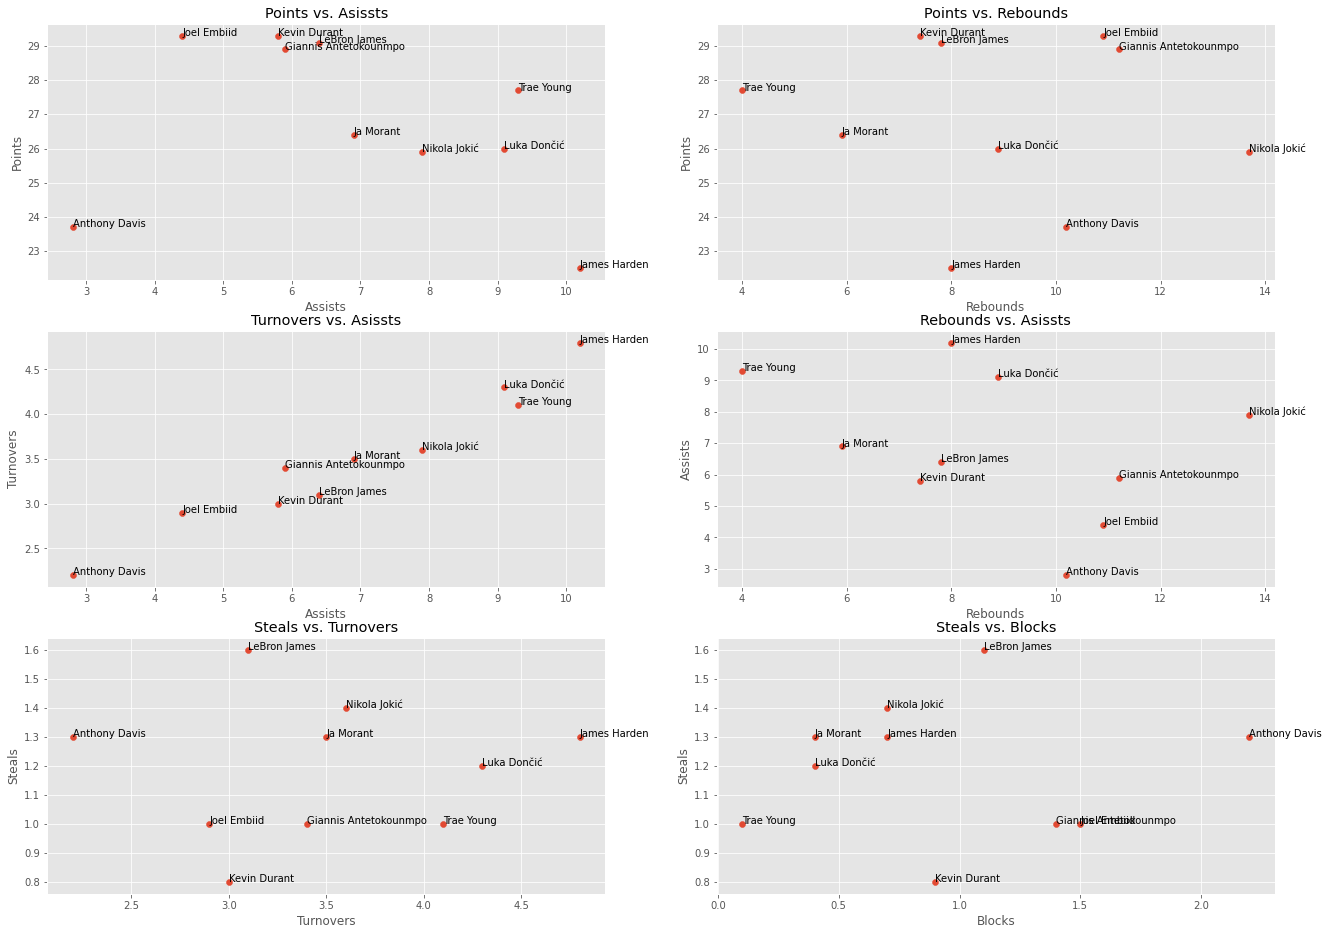

In [24]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(22,16))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)


ax1.scatter(top10['AST'], top10['PTS'])
for i, txt in enumerate(top10['Player']):
  ax1.annotate(txt, (top10.loc[i,'AST'], top10.loc[i,'PTS']))
ax1.set_title('Points vs. Asissts')
ax1.set_xlabel('Assists')
ax1.set_ylabel('Points')

ax2.scatter(top10['TRB'], top10['PTS'])
for i, txt in enumerate(top10['Player']):
  ax2.annotate(txt, (top10.loc[i,'TRB'], top10.loc[i,'PTS']))
ax2.set_title('Points vs. Rebounds')
ax2.set_xlabel('Rebounds')
ax2.set_ylabel('Points')

ax3.scatter(top10['AST'], top10['TOV'])
for i, txt in enumerate(top10['Player']):
  ax3.annotate(txt, (top10.loc[i,'AST'], top10.loc[i,'TOV']))
ax3.set_title('Turnovers vs. Asissts')
ax3.set_xlabel('Assists')
ax3.set_ylabel('Turnovers')


ax4.scatter(top10['TRB'], top10['AST'])
for i, txt in enumerate(top10['Player']):
  ax4.annotate(txt, (top10.loc[i,'TRB'], top10.loc[i,'AST']))
ax4.set_title('Rebounds vs. Asissts')
ax4.set_xlabel('Rebounds')
ax4.set_ylabel('Assists')

ax5.scatter(top10['TOV'], top10['STL'])
for i, txt in enumerate(top10['Player']):
  ax5.annotate(txt, (top10.loc[i,'TOV'], top10.loc[i,'STL']))
ax5.set_title('Steals vs. Turnovers')
ax5.set_xlabel('Turnovers')
ax5.set_ylabel('Steals')

ax6.scatter(top10['BLK'], top10['STL'])
for i, txt in enumerate(top10['Player']):
  ax6.annotate(txt, (top10.loc[i,'BLK'], top10.loc[i,'STL']))
ax6.set_title('Steals vs. Blocks')
ax6.set_xlabel('Blocks')
ax6.set_ylabel('Steals')



Text(0, 0.5, 'Free throw %')

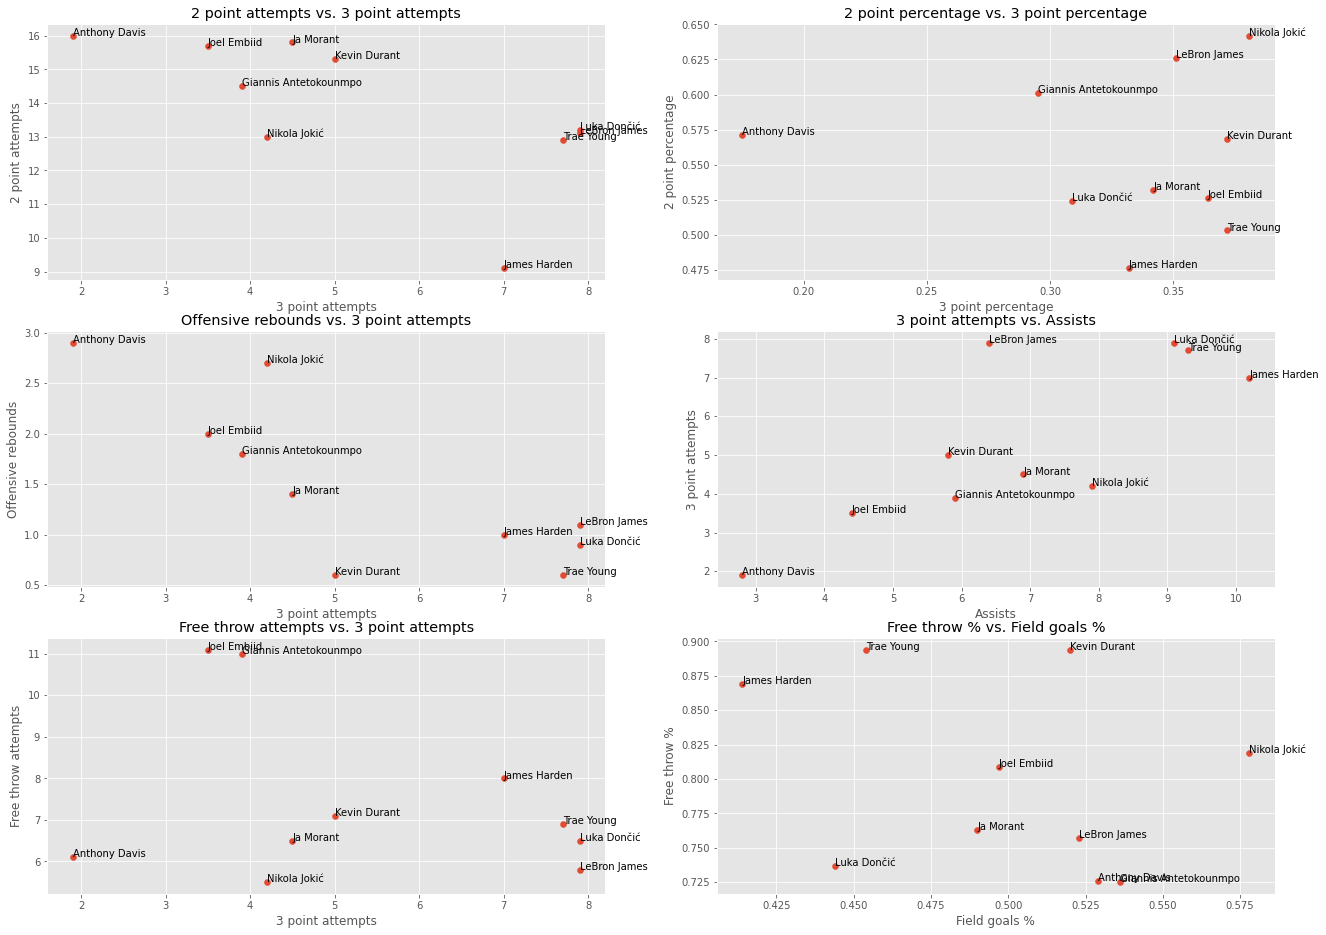

In [25]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(22,16))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)


ax1.scatter(top10['3PA'], top10['2PA'])
for i, txt in enumerate(top10['Player']):
  ax1.annotate(txt, (top10.loc[i,'3PA'], top10.loc[i,'2PA']))
ax1.set_title('2 point attempts vs. 3 point attempts')
ax1.set_xlabel('3 point attempts')
ax1.set_ylabel('2 point attempts')

ax2.scatter(top10['3P%'], top10['2P%'])
for i, txt in enumerate(top10['Player']):
  ax2.annotate(txt, (top10.loc[i,'3P%'], top10.loc[i,'2P%']))
ax2.set_title('2 point percentage vs. 3 point percentage')
ax2.set_xlabel('3 point percentage')
ax2.set_ylabel('2 point percentage')


ax3.scatter(top10['3PA'], top10['ORB'])
for i, txt in enumerate(top10['Player']):
  ax3.annotate(txt, (top10.loc[i,'3PA'], top10.loc[i,'ORB']))
ax3.set_title('Offensive rebounds vs. 3 point attempts')
ax3.set_xlabel('3 point attempts')
ax3.set_ylabel('Offensive rebounds')

ax4.scatter(top10['AST'], top10['3PA'])
for i, txt in enumerate(top10['Player']):
  ax4.annotate(txt, (top10.loc[i,'AST'], top10.loc[i,'3PA']))
ax4.set_title('3 point attempts vs. Assists')
ax4.set_xlabel('Assists')
ax4.set_ylabel('3 point attempts')

ax5.scatter(top10['3PA'], top10['FTA'])
for i, txt in enumerate(top10['Player']):
  ax5.annotate(txt, (top10.loc[i,'3PA'], top10.loc[i,'FTA']))
ax5.set_title('Free throw attempts vs. 3 point attempts')
ax5.set_xlabel('3 point attempts')
ax5.set_ylabel('Free throw attempts')

ax6.scatter(top10['FG%'], top10['FT%'])
for i, txt in enumerate(top10['Player']):
  ax6.annotate(txt, (top10.loc[i,'FG%'], top10.loc[i,'FT%']))
ax6.set_title('Free throw % vs. Field goals %')
ax6.set_xlabel('Field goals %')
ax6.set_ylabel('Free throw %')

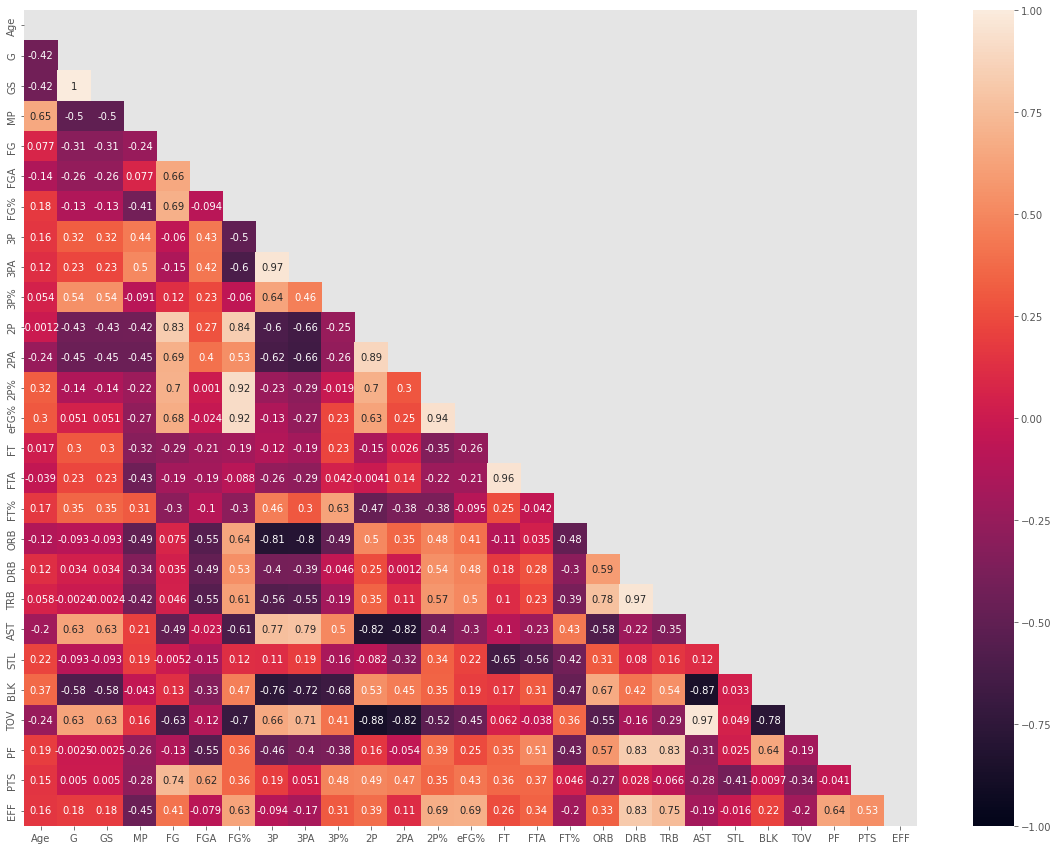

In [26]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(111)

corrMatrix = top10.corr()
# show only bottom triangle for correlation plot
mask = np.zeros(corrMatrix.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
ax1 = sns.heatmap(corrMatrix, vmin=-1, vmax=1, annot=True, mask=mask)
plt.show()

In [27]:
#GoalExtract the biggest positive and negative corelation coeffients
#Prepare cleaned correlation matrix without duplicated values and without correlation coefficients for parameters by itself. Those values are upper triangle. Swap with zeros
corrMatrix = top10.corr()

#convert to numpy array to enable use of np.triu_indices
np_corrMatrix = corrMatrix.to_numpy()
#swap upper triangle with 0
np_corrMatrix[np.triu_indices(len(np_corrMatrix))] = False
#convert back to pandas data frame
cleaned_corrMatrix = pd.DataFrame(np_corrMatrix, columns=corrMatrix.columns, index=corrMatrix.index)

#Extract higher correlations than 0.7. First positive

#Make one column to sort
OneColumn = cleaned_corrMatrix.unstack()
#Change to dataframe
df_OneColumn = pd.DataFrame(OneColumn, columns=['Correlation coefficient'])
#Sort positive up
df_OneColumn = df_OneColumn.sort_values('Correlation coefficient', ascending=False)
#Filter the highest positive correlation coefficients
Top_positive_correlations = df_OneColumn[df_OneColumn['Correlation coefficient'] >= 0.7]
Top_positive_correlations

Correlation coefficient
G   GS                   1.000000
AST TOV                  0.969227
DRB TRB                  0.968303
3P  3PA                  0.967378
FT  FTA                  0.955143
2P% eFG%                 0.944535
FG% eFG%                 0.918519
    2P%                  0.918202
2P  2PA                  0.889901
FG% 2P                   0.836083
FG  2P                   0.833949
TRB PF                   0.832452
DRB PF                   0.830588
    EFF                  0.827038
3PA AST                  0.787625
ORB TRB                  0.775759
3P  AST                  0.766436
TRB EFF                  0.750559
FG  PTS                  0.735164
3PA TOV                  0.714028
FG  2P%                  0.700101

In [28]:
#Sort negative up
df_OneColumn = df_OneColumn.sort_values('Correlation coefficient', ascending=True)
#Filter the highest negative correlation coefficients
Top_negative_correlations = df_OneColumn[df_OneColumn['Correlation coefficient'] <= -0.7]
Top_negative_correlations

Correlation coefficient
2P  TOV                -0.879379
AST BLK                -0.866223
2P  AST                -0.822921
2PA TOV                -0.821434
    AST                -0.815786
3P  ORB                -0.808259
3PA ORB                -0.799429
BLK TOV                -0.779428
3P  BLK                -0.759466
3PA BLK                -0.718121

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureW

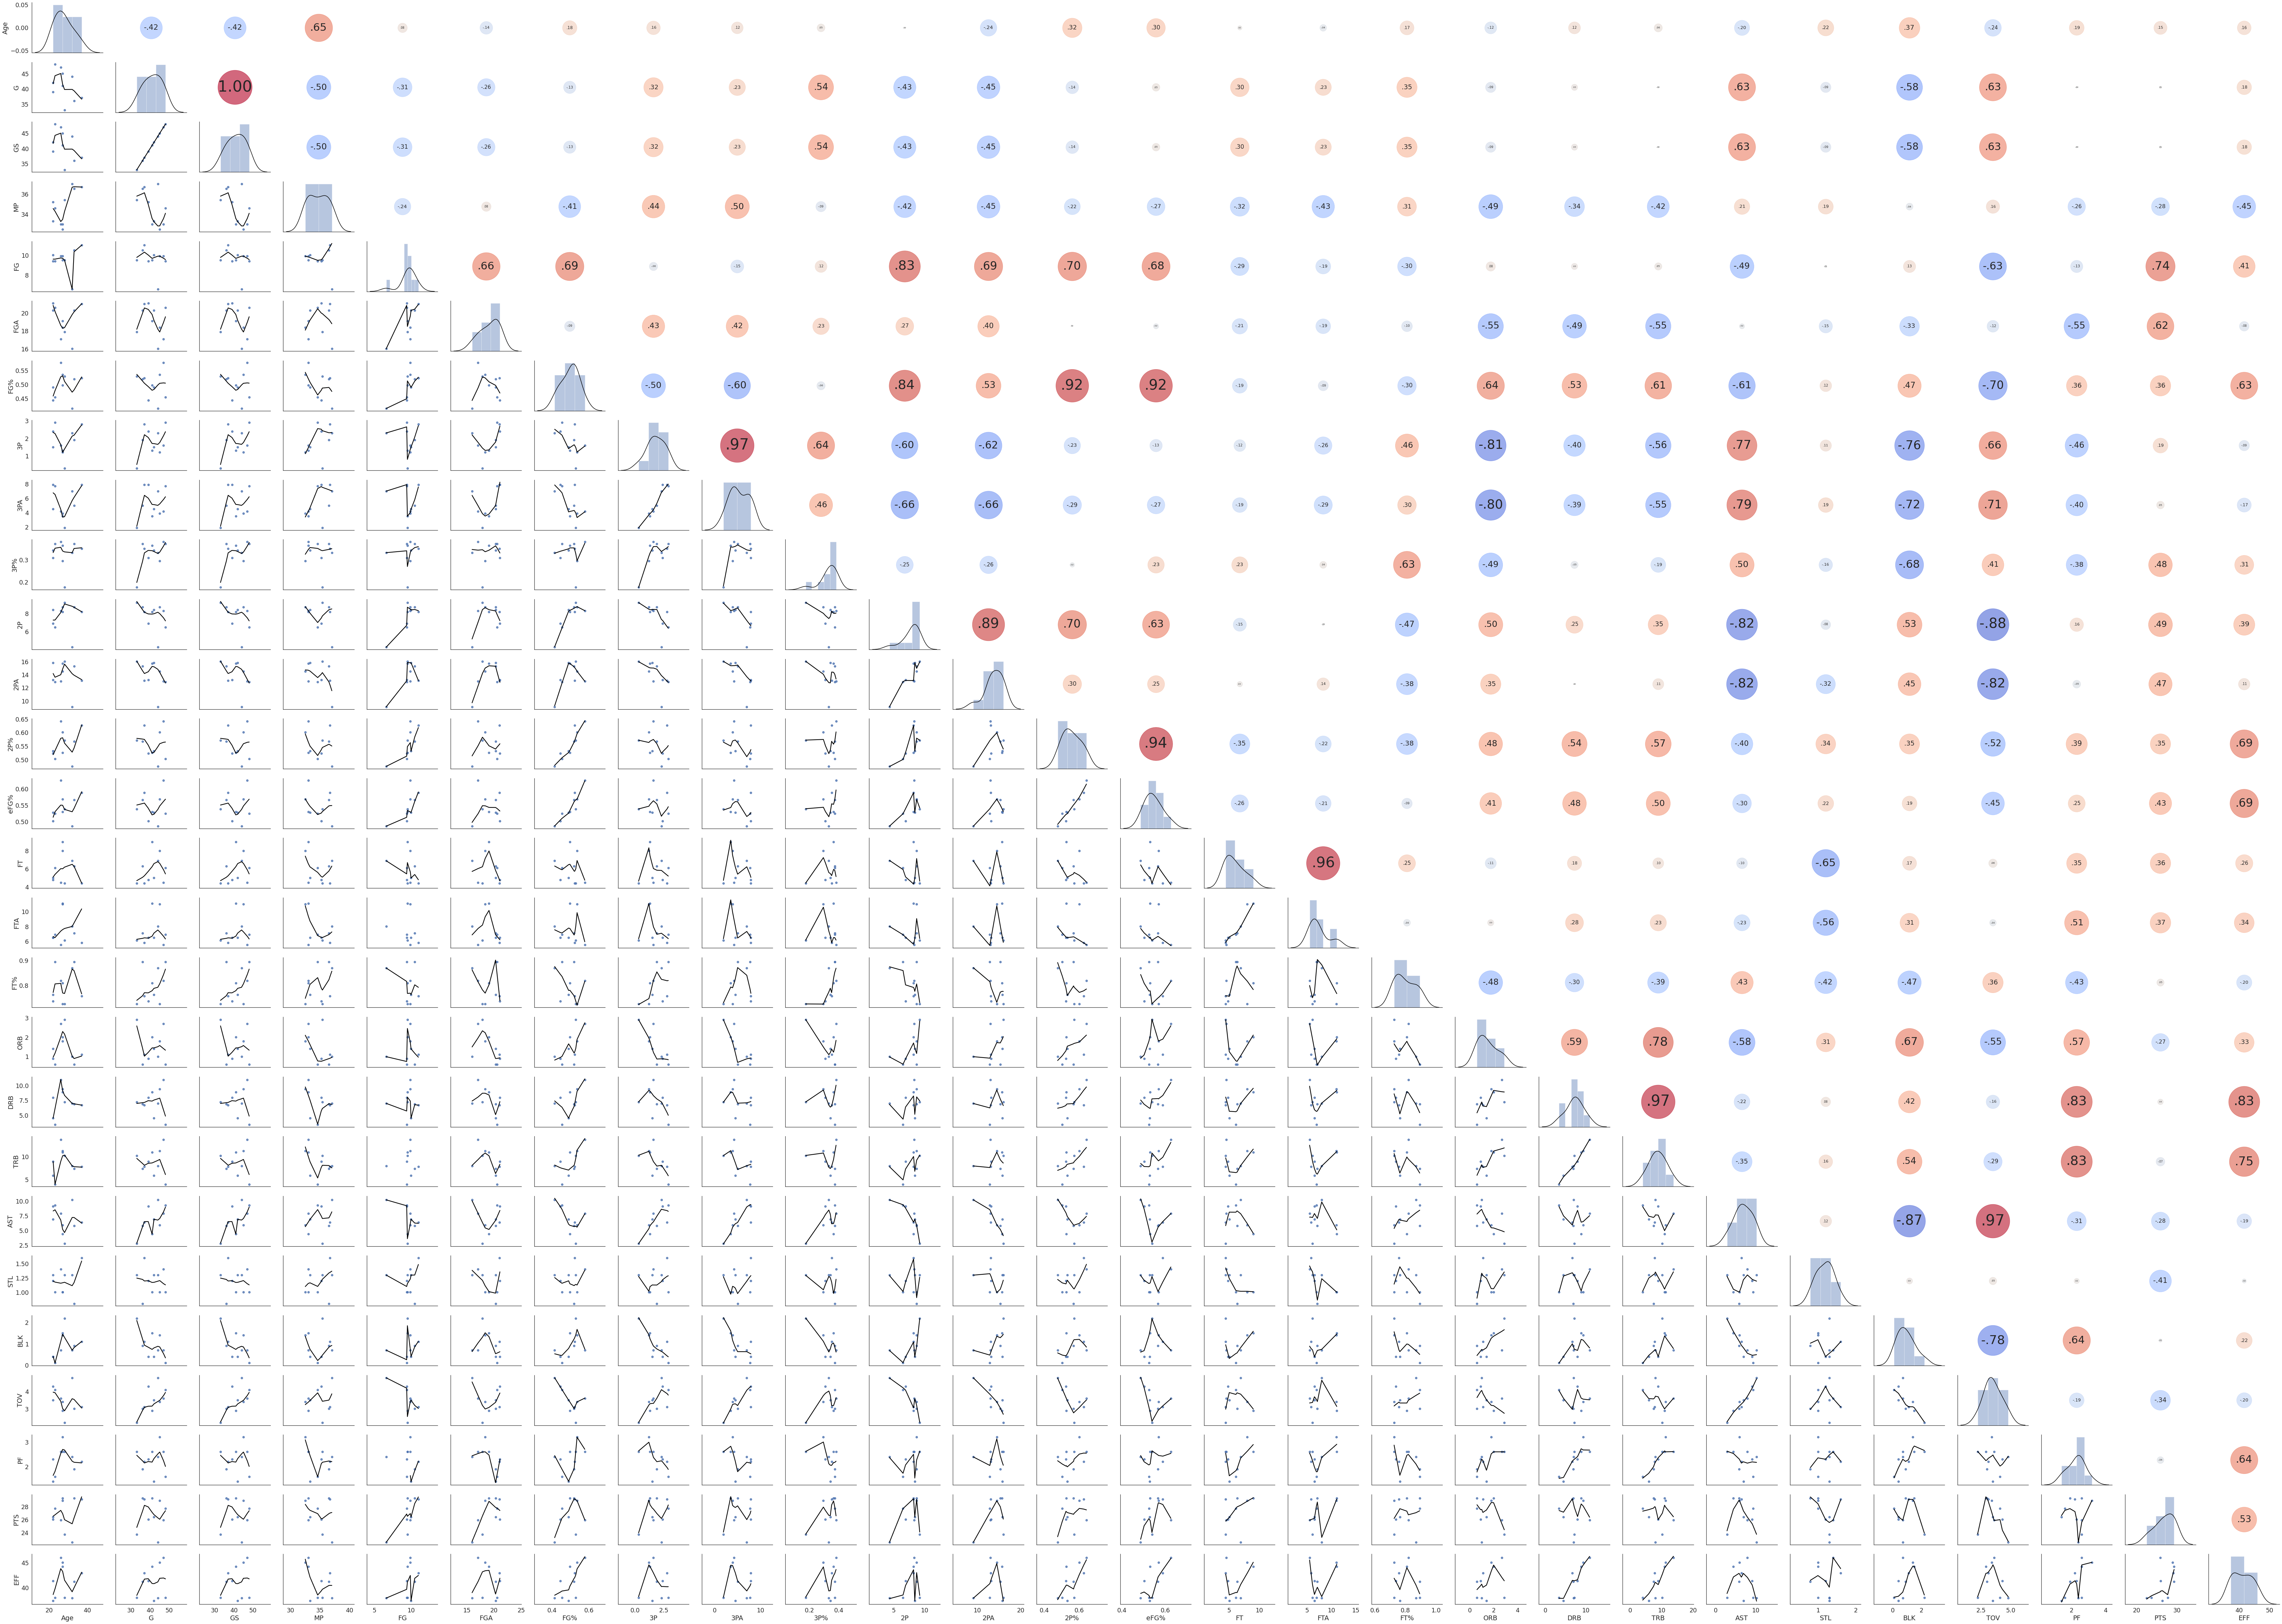

In [41]:
def corrdot(*args, **kwargs):
  corr_r = args[0].corr(args[1], 'pearson')
  corr_text = f'{corr_r:2.2f}'.replace('0.', '.')
  ax = plt.gca()
  ax.set_axis_off()
  marker_size = abs(corr_r) * 10000
  ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap='coolwarm', vmin=-1, vmax=1, transform=ax.transAxes)
  font_size = abs(corr_r) * 40 + 5
  ax.annotate(corr_text, [.5, .5,], xycoords='axes fraction', ha='center', va='center', fontsize=font_size)

sns.set(style='white', font_scale=1.6)
g = sns.PairGrid(top10, aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
g.map_diag(sns.histplot, kde=True)
g.map_upper(corrdot)

# Findings on top 10 NBA players based on efficacy
1. Age does not correlate with success of top 10 players
2. Field goals % has high correlation with field goals made, which is logical. Surprisingly there is no correlation with field goals attempts. Field goals percentage also has high positive correlation with 2 points attempts and rebounds. On the other hand high negative correlation with 3 points attempts. -> Possible hypothesis -> Players who play closer to the basket have higher field goals percentage as they have more dunks and lay ups.
3. Players who shoot more for 3 points shoot less for 2 points and less free throws as they are less fouls commited on them. They also have less rebounds and less blocks as they play more away from basket. The opposite as for players who shoot more for 3 points is valid for players who shoot more for 2 points.
4. Rebounds (offensive, defensive, total) are highly positively correlated, which is logical. 
5. Assist have high positive correlation with 3 points attempts, turnovers and games played. On the other hand they have high negative correlation with 2 points attempts and block. 
6. Efficacy has high positive correlation with % of field goals made, % of 2 points shots made, defensive and total rebounds. On the other hand there is no high negative corelation which would stand out.

# All NBA players (filter more than 20 played games and more than 12 minutes average playing time) analysis

In [29]:
all = df3[(df3['MP'] > 12) & (df3['G'] > 20)].reset_index()
all = all.iloc[:,1:]
all

Player Pos  Age   Tm   G  ...  BLK  TOV   PF   PTS   EFF
0            Precious Achiuwa   C   22  TOR  43  ...  0.6  1.0  2.0   7.7  16.2
1                Steven Adams   C   28  MEM  51  ...  0.6  1.6  1.8   6.6  19.1
2                 Bam Adebayo   C   24  MIA  30  ...  0.6  3.0  3.2  18.3  31.0
3           LaMarcus Aldridge   C   36  BRK  36  ...  1.1  0.9  1.8  13.4  20.5
4    Nickeil Alexander-Walker  SG   23  NOP  50  ...  0.4  1.7  1.8  12.8  18.4
..                        ...  ..  ...  ...  ..  ...  ...  ...  ...   ...   ...
354            Thaddeus Young  PF   33  SAS  26  ...  0.3  1.2  1.5   6.1  12.0
355                Trae Young  PG   23  ATL  48  ...  0.1  4.1  1.6  27.7  38.0
356            Omer Yurtseven   C   23  MIA  39  ...  0.5  0.9  1.7   6.0  13.1
357               Cody Zeller   C   29  POR  27  ...  0.2  0.7  2.1   5.2  10.4
358               Ivica Zubac   C   24  LAC  49  ...  1.0  1.4  2.5   9.6  18.9

[359 rows x 30 columns]

Text(0, 0.5, 'Steals')

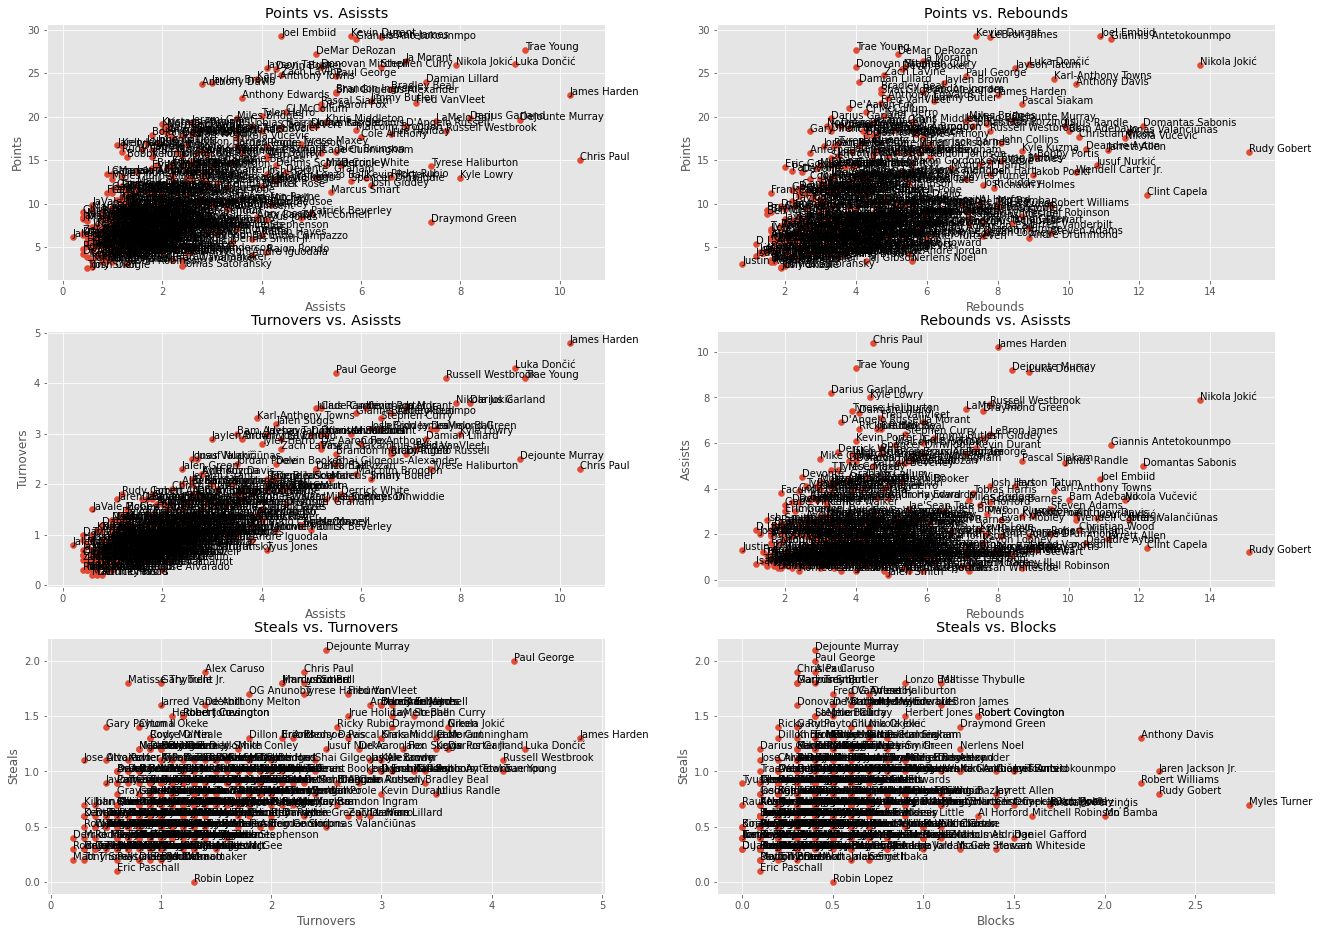

In [30]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(22,16))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)


ax1.scatter(all['AST'], all['PTS'])
for i, txt in enumerate(all['Player']):
  ax1.annotate(txt, (all.loc[i,'AST'], all.loc[i,'PTS']))
ax1.set_title('Points vs. Asissts')
ax1.set_xlabel('Assists')
ax1.set_ylabel('Points')

ax2.scatter(all['TRB'], all['PTS'])
for i, txt in enumerate(all['Player']):
  ax2.annotate(txt, (all.loc[i,'TRB'], all.loc[i,'PTS']))
ax2.set_title('Points vs. Rebounds')
ax2.set_xlabel('Rebounds')
ax2.set_ylabel('Points')

ax3.scatter(all['AST'], all['TOV'])
for i, txt in enumerate(all['Player']):
  ax3.annotate(txt, (all.loc[i,'AST'], all.loc[i,'TOV']))
ax3.set_title('Turnovers vs. Asissts')
ax3.set_xlabel('Assists')
ax3.set_ylabel('Turnovers')


ax4.scatter(all['TRB'], all['AST'])
for i, txt in enumerate(all['Player']):
  ax4.annotate(txt, (all.loc[i,'TRB'], all.loc[i,'AST']))
ax4.set_title('Rebounds vs. Asissts')
ax4.set_xlabel('Rebounds')
ax4.set_ylabel('Assists')

ax5.scatter(all['TOV'], all['STL'])
for i, txt in enumerate(all['Player']):
  ax5.annotate(txt, (all.loc[i,'TOV'], all.loc[i,'STL']))
ax5.set_title('Steals vs. Turnovers')
ax5.set_xlabel('Turnovers')
ax5.set_ylabel('Steals')

ax6.scatter(all['BLK'], all['STL'])
for i, txt in enumerate(all['Player']):
  ax6.annotate(txt, (all.loc[i,'BLK'], all.loc[i,'STL']))
ax6.set_title('Steals vs. Blocks')
ax6.set_xlabel('Blocks')
ax6.set_ylabel('Steals')

Text(0, 0.5, 'Free throw %')

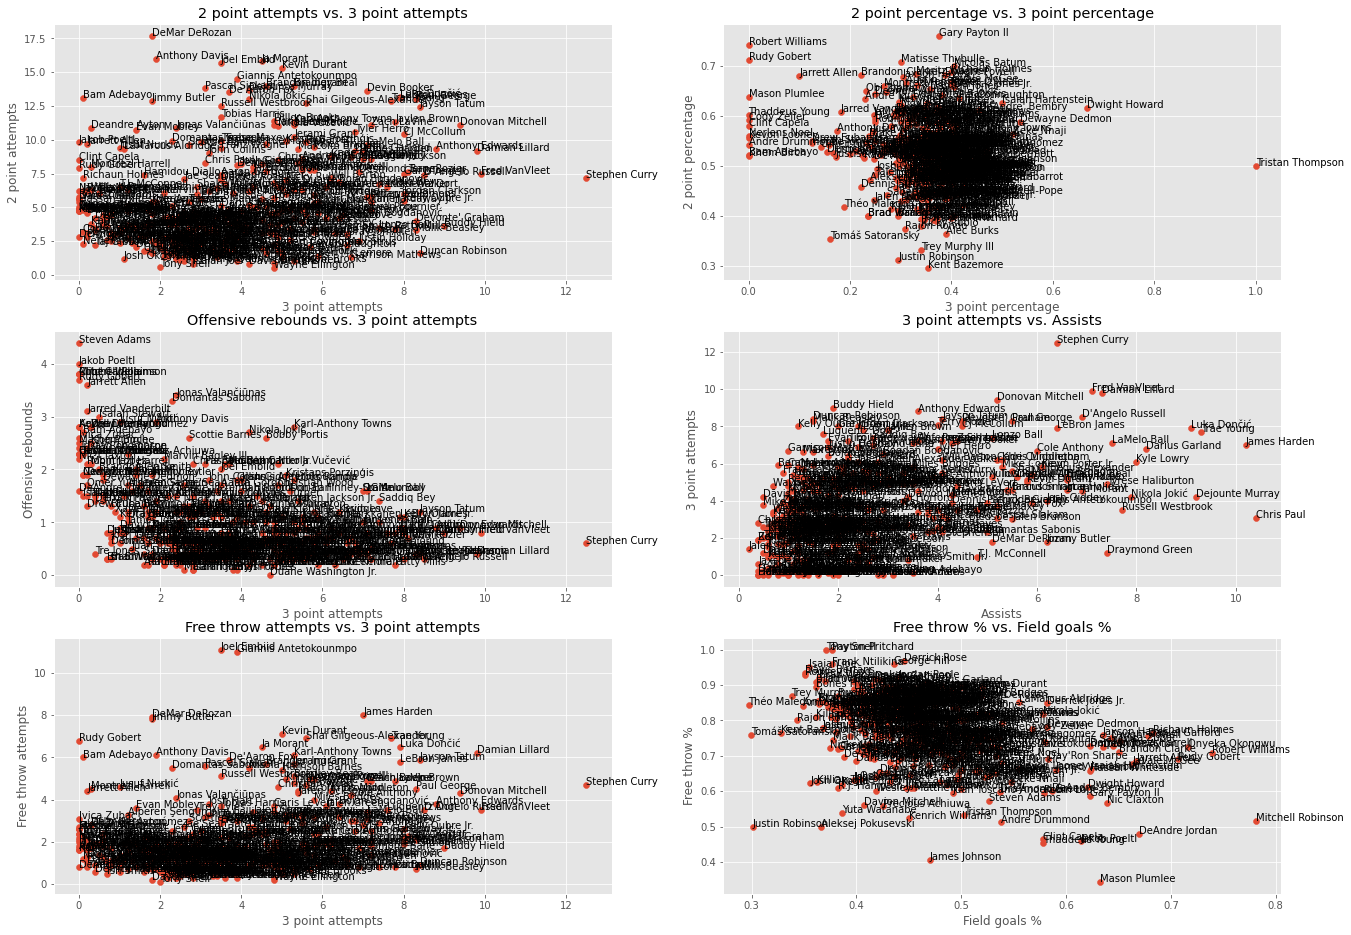

In [31]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(22,16))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)


ax1.scatter(all['3PA'], all['2PA'])
for i, txt in enumerate(all['Player']):
  ax1.annotate(txt, (all.loc[i,'3PA'], all.loc[i,'2PA']))
ax1.set_title('2 point attempts vs. 3 point attempts')
ax1.set_xlabel('3 point attempts')
ax1.set_ylabel('2 point attempts')

ax2.scatter(all['3P%'], all['2P%'])
for i, txt in enumerate(all['Player']):
  ax2.annotate(txt, (all.loc[i,'3P%'], all.loc[i,'2P%']))
ax2.set_title('2 point percentage vs. 3 point percentage')
ax2.set_xlabel('3 point percentage')
ax2.set_ylabel('2 point percentage')


ax3.scatter(all['3PA'], all['ORB'])
for i, txt in enumerate(all['Player']):
  ax3.annotate(txt, (all.loc[i,'3PA'], all.loc[i,'ORB']))
ax3.set_title('Offensive rebounds vs. 3 point attempts')
ax3.set_xlabel('3 point attempts')
ax3.set_ylabel('Offensive rebounds')

ax4.scatter(all['AST'], all['3PA'])
for i, txt in enumerate(all['Player']):
  ax4.annotate(txt, (all.loc[i,'AST'], all.loc[i,'3PA']))
ax4.set_title('3 point attempts vs. Assists')
ax4.set_xlabel('Assists')
ax4.set_ylabel('3 point attempts')

ax5.scatter(all['3PA'], all['FTA'])
for i, txt in enumerate(all['Player']):
  ax5.annotate(txt, (all.loc[i,'3PA'], all.loc[i,'FTA']))
ax5.set_title('Free throw attempts vs. 3 point attempts')
ax5.set_xlabel('3 point attempts')
ax5.set_ylabel('Free throw attempts')

ax6.scatter(all['FG%'], all['FT%'])
for i, txt in enumerate(all['Player']):
  ax6.annotate(txt, (all.loc[i,'FG%'], all.loc[i,'FT%']))
ax6.set_title('Free throw % vs. Field goals %')
ax6.set_xlabel('Field goals %')
ax6.set_ylabel('Free throw %')

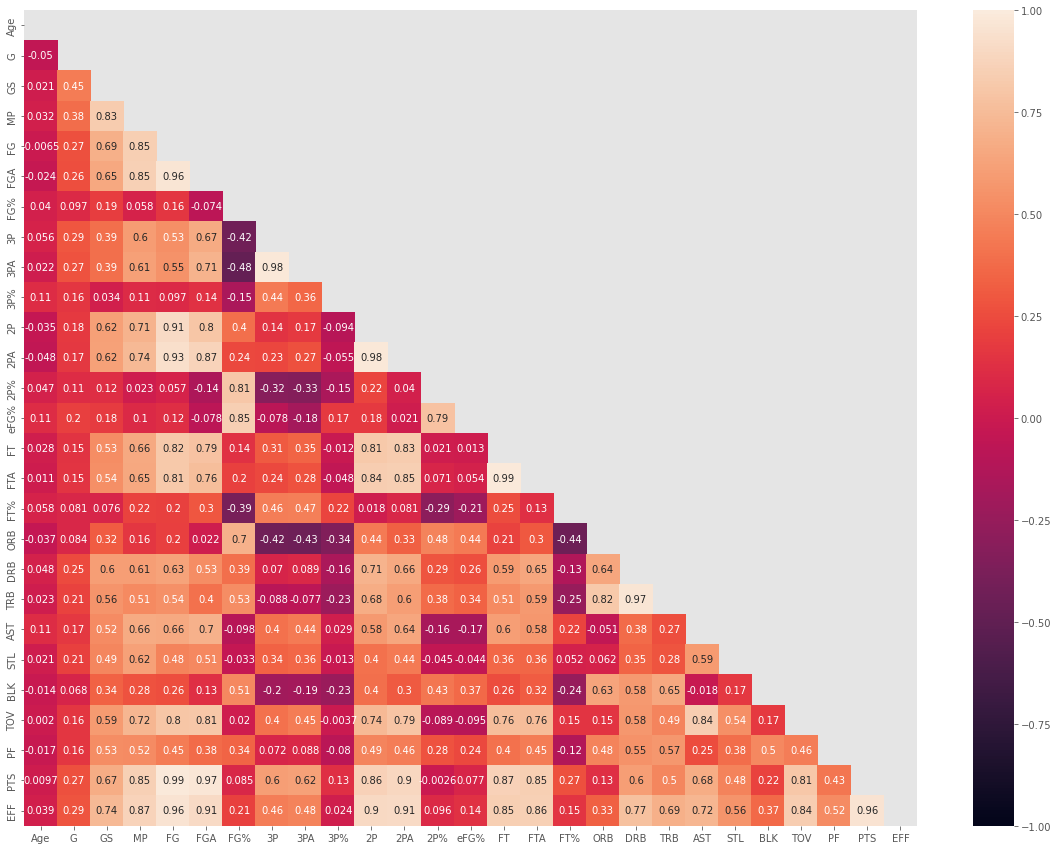

In [32]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(111)

corrMatrix = all.corr()
# show only bottom triangle for correlation plot
mask = np.zeros(corrMatrix.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
ax1 = sns.heatmap(corrMatrix, vmin=-1, vmax=1, annot=True, mask=mask)
plt.show()

In [33]:
#GoalExtract the biggest positive and negative corelation coeffients
#Prepare cleaned correlation matrix without duplicated values and without correlation coefficients for parameters by itself. Those values are upper triangle. Swap with zeros
corrMatrix = all.corr()

#convert to numpy array to enable use of np.triu_indices
np_corrMatrix = corrMatrix.to_numpy()
#swap upper triangle with 0
np_corrMatrix[np.triu_indices(len(np_corrMatrix))] = False
#convert back to pandas data frame
cleaned_corrMatrix = pd.DataFrame(np_corrMatrix, columns=corrMatrix.columns, index=corrMatrix.index)

#Extract higher correlations than 0.7. First positive

#Make one column to sort
OneColumn = cleaned_corrMatrix.unstack()
#Change to dataframe
df_OneColumn = pd.DataFrame(OneColumn, columns=['Correlation coefficient'])
#Sort positive up
df_OneColumn = df_OneColumn.sort_values('Correlation coefficient', ascending=False)
#Filter the highest positive correlation coefficients
Top_positive_correlations = df_OneColumn[df_OneColumn['Correlation coefficient'] >= 0.7]
Top_positive_correlations

Correlation coefficient
FG  PTS                  0.987519
FT  FTA                  0.986636
3P  3PA                  0.980828
2P  2PA                  0.976690
FGA PTS                  0.974921
DRB TRB                  0.966793
FG  FGA                  0.964404
    EFF                  0.960300
PTS EFF                  0.955462
FG  2PA                  0.930600
FGA EFF                  0.913176
FG  2P                   0.912284
2PA EFF                  0.910002
2P  EFF                  0.902146
2PA PTS                  0.896383
MP  EFF                  0.871705
FGA 2PA                  0.871682
FT  PTS                  0.867075
2P  PTS                  0.864731
FTA EFF                  0.856180
MP  FGA                  0.854676
    PTS                  0.853612
FT  EFF                  0.851510
MP  FG                   0.851405
FTA PTS                  0.849188
FG% eFG%                 0.849039
2PA FTA                  0.845967
AST TOV                  0.840805
2P  FTA                  0.838305
TOV EFF                  0.836490
2PA FT                   0.833714
GS  MP                   0.829327
FG  FT                   0.820250
ORB TRB                  0.816989
FG  FTA                  0.813629
2P  FT                   0.813327
FG% 2P%                  0.811103
TOV PTS                  0.809376
FGA TOV                  0.809057
    2P                   0.804404
FG  TOV                  0.798420
2PA TOV                  0.790110
FGA FT                   0.787358
2P% eFG%                 0.785079
DRB EFF                  0.774987
FGA FTA                  0.761500
FT  TOV                  0.759543
FTA TOV                  0.756348
2P  TOV                  0.739651
MP  2PA                  0.738795
GS  EFF                  0.735688
AST EFF                  0.724833
MP  TOV                  0.719718
FGA 3PA                  0.708016
2P  DRB                  0.706312
MP  2P                   0.705806

In [34]:
#Sort negative up
df_OneColumn = df_OneColumn.sort_values('Correlation coefficient', ascending=True)
#Filter the highest negative correlation coefficients
Top_negative_correlations = df_OneColumn[df_OneColumn['Correlation coefficient'] <= -0.7]
Top_negative_correlations

Empty DataFrame
Columns: [Correlation coefficient]
Index: []

# Findings on correlations for NBA all players that played more than 20 games with average more than 12 minutes played
If we compare findings with top10 NBA players, we immediately see, that there is far less negative correlations as with top10 NBA players. Furthermore, all strong correlations (> 0.7) are positive.
1. Age does not correlate with success
2. Minutes played and games started: In general for players who started more games and play more minutes there are only a few parameters which are not higly positively correlated. This means, that in general player better players are better in almost all statistical categories (all but turnovers are positive in terms of play). They also have more time to fill the statistics, as they play more time per game.
3. Interestingly, field goals percentage only have high positive correlation with free throws percentage and two points percentage and does not have high corelation with any other statistical parameters, meaning it does not influence significatnly on other parameters.
4. Players who shoot more for three points have higher field goals attempts and score more points, which is logical. 2 points attempts are highly correlated with almost all statistical parameters with excepetion of 3 points shots statistics. This which is a lot different comparing to top10 NBA players, prooving the best players are outliers.
5. Same as with top10 NBA players rebounds (offensive, defensive, total) are highly positively correlated, which is logical. There is also high positive correlation with blocks.
6. Assists have high positive correlation with field goals, 2 points shots, free throw, steals, points and turnovers statistics.
7. Steals do not have high positive correlation with any of other statistical parameters. The highest with minutes played.
8. Turnovers is negative statistical parameter in terms of play. However, it has high correlation with efficacy and other positive statistical parameters, meaning better players also make more mistakes, as they have ball more in their hands.
9. Efficiency is highly correlated with games started, field goals attempts, 2 points attempts, free throws attempts, rebounds, assists, turnovers and points, which is basicaly the equation for EFF (with exceptio of turnovers, which should be negatively correlated (explained above).


This observations are a lot different comparing to top10 NBA players, prooving the best players are outliers.

# Starter NBA players analysis (filter more than 30 games started, and more then 24 minutes playing time)

In [35]:
starters = df3[(df3['GS'] > 30) & (df3['MP'] > 24)].reset_index()
starters = starters.iloc[:,1:]
starters

Player Pos  Age   Tm   G  ...  BLK  TOV   PF   PTS   EFF
0             Steven Adams   C   28  MEM  51  ...  0.6  1.6  1.8   6.6  19.1
1            Grayson Allen  SG   26  MIL  45  ...  0.3  0.6  1.4  11.7  17.2
2            Jarrett Allen   C   23  CLE  46  ...  1.4  1.8  1.8  16.2  29.5
3    Giannis Antetokounmpo  PF   27  MIL  45  ...  1.4  3.4  3.2  28.9  45.0
4             Cole Anthony  PG   21  ORL  41  ...  0.3  2.8  2.6  17.7  28.0
..                     ...  ..  ...  ...  ..  ...  ...  ...  ...   ...   ...
128         Andrew Wiggins  SF   26  GSW  49  ...  0.7  1.5  1.9  18.1  24.7
129        Robert Williams   C   24  BOS  44  ...  2.2  1.2  2.1   9.8  23.2
130         Christian Wood   C   26  HOU  50  ...  0.9  1.9  2.5  17.7  30.0
131             Trae Young  PG   23  ATL  48  ...  0.1  4.1  1.6  27.7  38.0
132            Ivica Zubac   C   24  LAC  49  ...  1.0  1.4  2.5   9.6  18.9

[133 rows x 30 columns]

Text(0, 0.5, 'Steals')

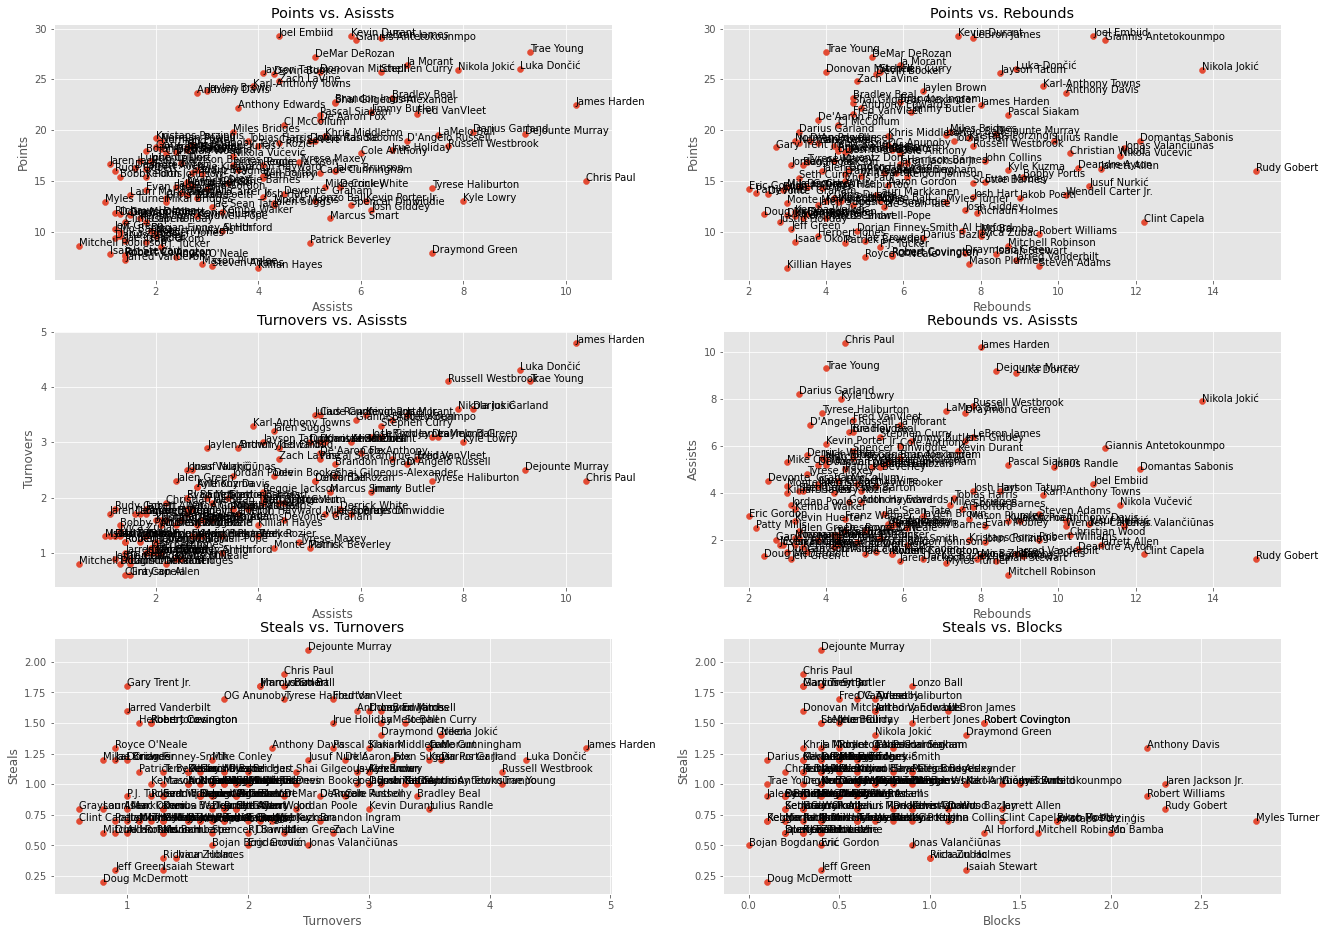

In [36]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(22,16))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)


ax1.scatter(starters['AST'], starters['PTS'])
for i, txt in enumerate(starters['Player']):
  ax1.annotate(txt, (starters.loc[i,'AST'], starters.loc[i,'PTS']))
ax1.set_title('Points vs. Asissts')
ax1.set_xlabel('Assists')
ax1.set_ylabel('Points')

ax2.scatter(starters['TRB'], starters['PTS'])
for i, txt in enumerate(starters['Player']):
  ax2.annotate(txt, (starters.loc[i,'TRB'], starters.loc[i,'PTS']))
ax2.set_title('Points vs. Rebounds')
ax2.set_xlabel('Rebounds')
ax2.set_ylabel('Points')

ax3.scatter(starters['AST'], starters['TOV'])
for i, txt in enumerate(starters['Player']):
  ax3.annotate(txt, (starters.loc[i,'AST'], starters.loc[i,'TOV']))
ax3.set_title('Turnovers vs. Asissts')
ax3.set_xlabel('Assists')
ax3.set_ylabel('Turnovers')


ax4.scatter(starters['TRB'], starters['AST'])
for i, txt in enumerate(starters['Player']):
  ax4.annotate(txt, (starters.loc[i,'TRB'], starters.loc[i,'AST']))
ax4.set_title('Rebounds vs. Asissts')
ax4.set_xlabel('Rebounds')
ax4.set_ylabel('Assists')

ax5.scatter(starters['TOV'], starters['STL'])
for i, txt in enumerate(starters['Player']):
  ax5.annotate(txt, (starters.loc[i,'TOV'], starters.loc[i,'STL']))
ax5.set_title('Steals vs. Turnovers')
ax5.set_xlabel('Turnovers')
ax5.set_ylabel('Steals')

ax6.scatter(starters['BLK'], starters['STL'])
for i, txt in enumerate(starters['Player']):
  ax6.annotate(txt, (starters.loc[i,'BLK'], starters.loc[i,'STL']))
ax6.set_title('Steals vs. Blocks')
ax6.set_xlabel('Blocks')
ax6.set_ylabel('Steals')

Text(0, 0.5, 'Free throw %')

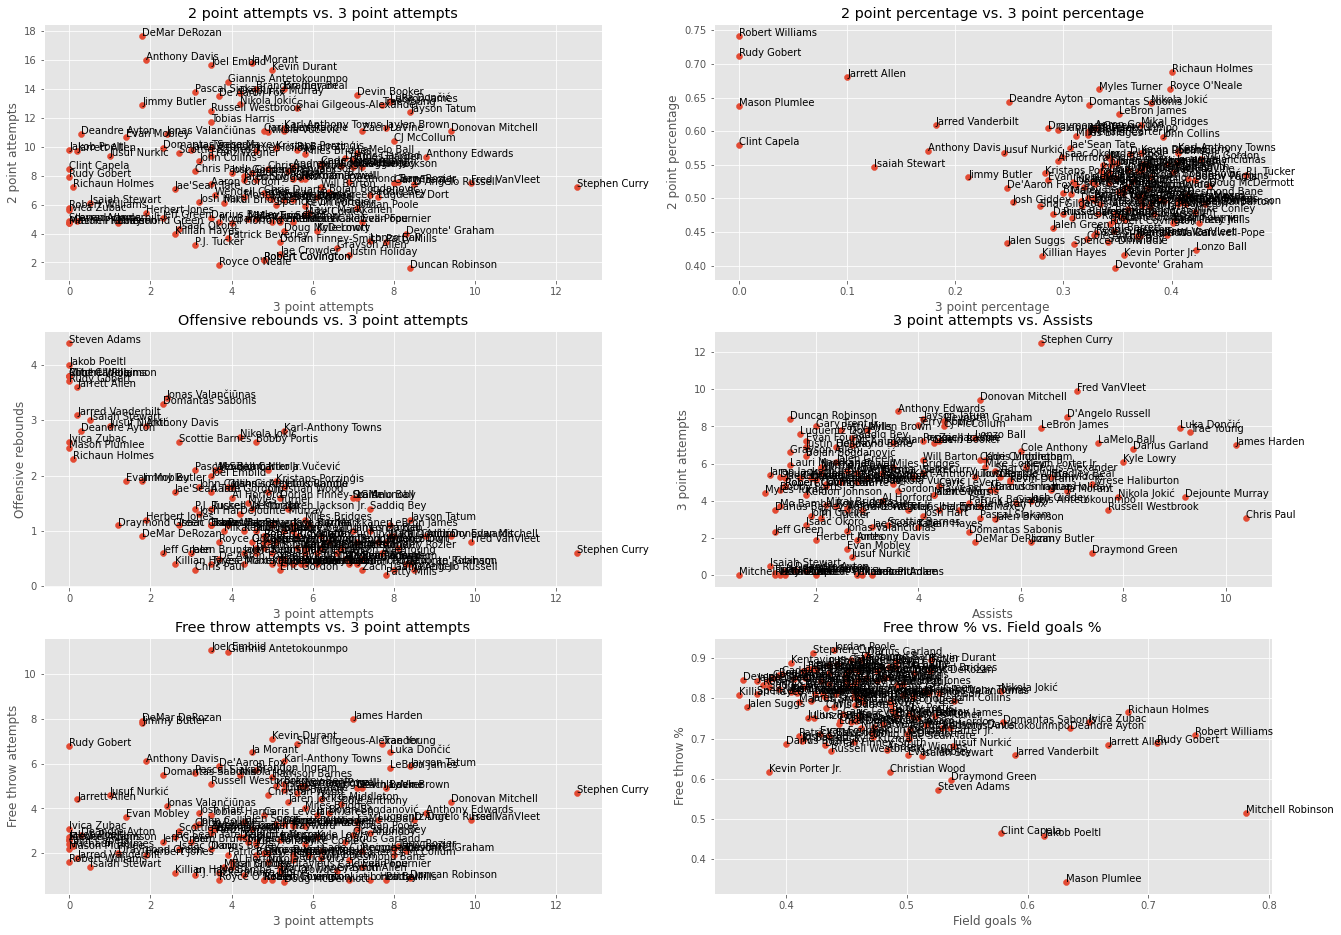

In [37]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(22,16))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)


ax1.scatter(starters['3PA'], starters['2PA'])
for i, txt in enumerate(starters['Player']):
  ax1.annotate(txt, (starters.loc[i,'3PA'], starters.loc[i,'2PA']))
ax1.set_title('2 point attempts vs. 3 point attempts')
ax1.set_xlabel('3 point attempts')
ax1.set_ylabel('2 point attempts')

ax2.scatter(starters['3P%'], starters['2P%'])
for i, txt in enumerate(starters['Player']):
  ax2.annotate(txt, (starters.loc[i,'3P%'], starters.loc[i,'2P%']))
ax2.set_title('2 point percentage vs. 3 point percentage')
ax2.set_xlabel('3 point percentage')
ax2.set_ylabel('2 point percentage')


ax3.scatter(starters['3PA'], starters['ORB'])
for i, txt in enumerate(starters['Player']):
  ax3.annotate(txt, (starters.loc[i,'3PA'], starters.loc[i,'ORB']))
ax3.set_title('Offensive rebounds vs. 3 point attempts')
ax3.set_xlabel('3 point attempts')
ax3.set_ylabel('Offensive rebounds')

ax4.scatter(starters['AST'], starters['3PA'])
for i, txt in enumerate(starters['Player']):
  ax4.annotate(txt, (starters.loc[i,'AST'], starters.loc[i,'3PA']))
ax4.set_title('3 point attempts vs. Assists')
ax4.set_xlabel('Assists')
ax4.set_ylabel('3 point attempts')

ax5.scatter(starters['3PA'], starters['FTA'])
for i, txt in enumerate(starters['Player']):
  ax5.annotate(txt, (starters.loc[i,'3PA'], starters.loc[i,'FTA']))
ax5.set_title('Free throw attempts vs. 3 point attempts')
ax5.set_xlabel('3 point attempts')
ax5.set_ylabel('Free throw attempts')

ax6.scatter(starters['FG%'], starters['FT%'])
for i, txt in enumerate(starters['Player']):
  ax6.annotate(txt, (starters.loc[i,'FG%'], starters.loc[i,'FT%']))
ax6.set_title('Free throw % vs. Field goals %')
ax6.set_xlabel('Field goals %')
ax6.set_ylabel('Free throw %')

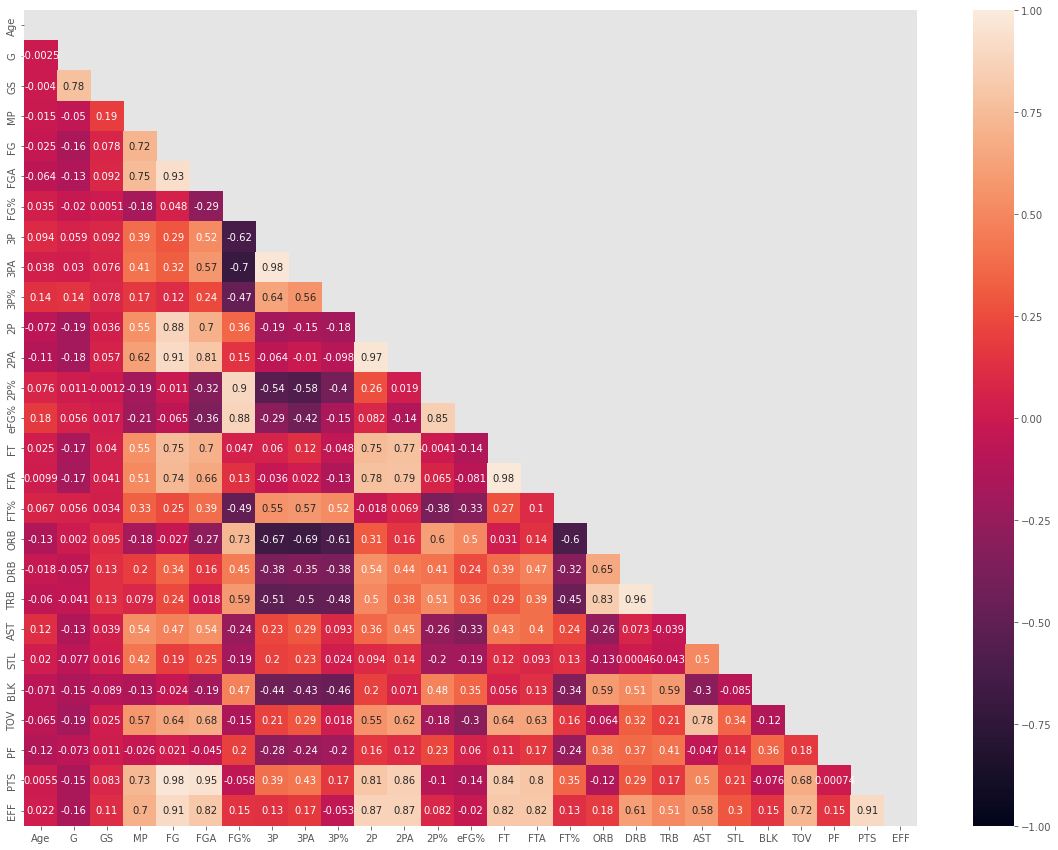

In [38]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(111)

corrMatrix = starters.corr()
# show only bottom triangle for correlation plot
mask = np.zeros(corrMatrix.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
ax1 = sns.heatmap(corrMatrix, vmin=-1, vmax=1, annot=True, mask=mask)
plt.show()

In [39]:
#GoalExtract the biggest positive and negative corelation coeffients
#Prepare cleaned correlation matrix without duplicated values and without correlation coefficients for parameters by itself. Those values are upper triangle. Swap with zeros
corrMatrix = starters.corr()

#convert to numpy array to enable use of np.triu_indices
np_corrMatrix = corrMatrix.to_numpy()
#swap upper triangle with 0
np_corrMatrix[np.triu_indices(len(np_corrMatrix))] = False
#convert back to pandas data frame
cleaned_corrMatrix = pd.DataFrame(np_corrMatrix, columns=corrMatrix.columns, index=corrMatrix.index)

#Extract higher correlations than 0.7. First positive

#Make one column to sort
OneColumn = cleaned_corrMatrix.unstack()
#Change to dataframe
df_OneColumn = pd.DataFrame(OneColumn, columns=['Correlation coefficient'])
#Sort positive up
df_OneColumn = df_OneColumn.sort_values('Correlation coefficient', ascending=False)
#Filter the highest positive correlation coefficients
Top_positive_correlations = df_OneColumn[df_OneColumn['Correlation coefficient'] >= 0.7]
Top_positive_correlations

Correlation coefficient
FT  FTA                  0.981952
3P  3PA                  0.975985
FG  PTS                  0.975532
2P  2PA                  0.965445
DRB TRB                  0.963162
FGA PTS                  0.950331
FG  FGA                  0.932191
    EFF                  0.912710
    2PA                  0.909856
PTS EFF                  0.905447
FG% 2P%                  0.895161
FG  2P                   0.882312
FG% eFG%                 0.879288
2PA EFF                  0.873529
2P  EFF                  0.871757
2PA PTS                  0.856962
2P% eFG%                 0.846649
FT  PTS                  0.835902
ORB TRB                  0.833263
FTA EFF                  0.819976
FGA EFF                  0.816246
FT  EFF                  0.815143
FGA 2PA                  0.812481
2P  PTS                  0.808215
FTA PTS                  0.802963
2PA FTA                  0.786635
AST TOV                  0.783144
G   GS                   0.777626
2P  FTA                  0.776470
2PA FT                   0.773676
FG  FT                   0.753999
MP  FGA                  0.746871
2P  FT                   0.746239
FG  FTA                  0.737885
MP  PTS                  0.730912
FG% ORB                  0.729181
TOV EFF                  0.724465
MP  FG                   0.715390
FGA 2P                   0.702389
    FT                   0.701423

In [40]:
#Sort negative up
df_OneColumn = df_OneColumn.sort_values('Correlation coefficient', ascending=True)
#Filter the highest negative correlation coefficients
Top_negative_correlations = df_OneColumn[df_OneColumn['Correlation coefficient'] <= -0.7]
Top_negative_correlations

Empty DataFrame
Columns: [Correlation coefficient]
Index: []

# Findings on starters

They are almost the same as for all players, which can be seen also from the strongest correlations which are the same. 